<h1>Modelos</h1>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

base = pd.read_csv("base_final.csv")

In [2]:
base_01 = base.drop(['Nota do Consumidor'], axis=1).copy()

In [3]:
base.drop(['Data Finalização', 'Respondida', 'Situação', 'Avaliação Reclamação', 'Nota do Consumidor'], axis=1, inplace=True)

In [4]:
base

,Região,UF,Cidade,Sexo,Faixa Etária,Tempo Resposta,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,nota insatisfatória
0,S,PR,Foz do Iguaçu,M,entre 31 a 40 anos,10,Conta corrente / Salário / Poupança /Conta Apo...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,0
1,S,PR,Curitiba,F,entre 41 a 50 anos,9,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Loja física,S,0
2,S,PR,Cruz Machado,M,entre 41 a 50 anos,9,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,Renegociação / parcelamento de dívida,Não comprei / contratei,S,1
3,S,PR,Curitiba,M,entre 51 a 60 anos,8,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Loja física,S,1
4,S,PR,São José dos Pinhais,M,entre 31 a 40 anos,8,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Internet,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18882,SE,RJ,Campos dos Goytacazes,F,entre 21 a 30 anos,6,Cartão de Crédito / Cartão de Débito / Cartão ...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Não comprei / contratei,S,1
18883,SE,MG,Belo Horizonte,F,entre 31 a 40 anos,8,Atendimento Bancário,Saúde e Segurança,"Risco, dano físico ou mal estar decorrente da ...",Loja física,S,0
18884,CO,DF,Brasília,M,entre 31 a 40 anos,5,Cartão de Crédito / Cartão de Débito / Cartão ...,Atendimento / SAC,SAC - Dificuldadede de contato / acesso,Internet,S,0
18885,SE,SP,Embu das Artes,M,entre 31 a 40 anos,10,Conta corrente / Salário / Poupança /Conta Apo...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Loja física,S,1


In [5]:
base.columns

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Tempo Resposta',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'nota insatisfatória'],
      dtype='object')

In [6]:
categoricas = ['Sexo', 'Faixa Etária', 'Tempo Resposta', 'Procurou Empresa']
X = base.filter(categoricas).copy()
y = base['nota insatisfatória'].copy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [8]:
X_train_n = pd.get_dummies(X_train)
X_train_n

,Tempo Resposta,Sexo_F,Sexo_M,Faixa Etária_até 20 anos,Faixa Etária_entre 21 a 30 anos,Faixa Etária_entre 31 a 40 anos,Faixa Etária_entre 41 a 50 anos,Faixa Etária_entre 51 a 60 anos,Faixa Etária_entre 61 a 70 anos,Faixa Etária_mais de 70 anos,Procurou Empresa_N,Procurou Empresa_S
17103,7,0,1,0,0,1,0,0,0,0,0,1
3518,3,0,1,0,0,0,0,1,0,0,0,1
11979,4,0,1,0,0,0,1,0,0,0,0,1
7622,2,1,0,0,0,0,1,0,0,0,0,1
11544,8,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2843,9,1,0,0,0,1,0,0,0,0,0,1
15969,7,0,1,0,0,1,0,0,0,0,1,0
9686,10,1,0,0,0,0,0,0,1,0,0,1
452,7,0,1,0,0,0,0,0,0,1,1,0


In [9]:
X_test_n = pd.get_dummies(X_test)
X_test_n

,Tempo Resposta,Sexo_F,Sexo_M,Faixa Etária_até 20 anos,Faixa Etária_entre 21 a 30 anos,Faixa Etária_entre 31 a 40 anos,Faixa Etária_entre 41 a 50 anos,Faixa Etária_entre 51 a 60 anos,Faixa Etária_entre 61 a 70 anos,Faixa Etária_mais de 70 anos,Procurou Empresa_N,Procurou Empresa_S
12623,10,0,1,0,1,0,0,0,0,0,0,1
14989,4,1,0,0,1,0,0,0,0,0,0,1
3795,10,1,0,0,0,1,0,0,0,0,0,1
11676,7,0,1,0,1,0,0,0,0,0,0,1
10951,8,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
293,7,0,1,0,0,1,0,0,0,0,0,1
16586,7,0,1,0,0,0,1,0,0,0,0,1
8534,10,0,1,0,0,1,0,0,0,0,0,1
957,7,1,0,0,0,0,0,1,0,0,0,1


<h2>Random Forest</h2>

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True)


In [11]:
rf.fit(X_train_n, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True)

In [12]:
y_pred = rf.predict(X_test_n)


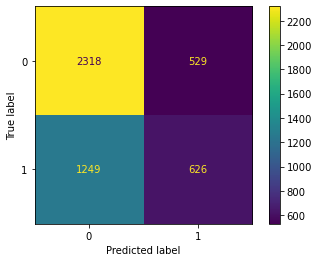

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test_n, y_test, values_format='d');

In [14]:
import numpy as np
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
features = X_train_n.columns
# summarize feature importance
for i,v in zip(features, importances):
	print('Feature: %s, Score: %.5f' % (i,v))

Feature: Tempo Resposta, Score: 0.46370
Feature: Sexo_F, Score: 0.02213
Feature: Sexo_M, Score: 0.02175
Feature: Faixa Etária_até 20 anos, Score: 0.02890
Feature: Faixa Etária_entre 21 a 30 anos, Score: 0.15604
Feature: Faixa Etária_entre 31 a 40 anos, Score: 0.04011
Feature: Faixa Etária_entre 41 a 50 anos, Score: 0.04519
Feature: Faixa Etária_entre 51 a 60 anos, Score: 0.04069
Feature: Faixa Etária_entre 61 a 70 anos, Score: 0.03011
Feature: Faixa Etária_mais de 70 anos, Score: 0.01547
Feature: Procurou Empresa_N, Score: 0.06938
Feature: Procurou Empresa_S, Score: 0.06654


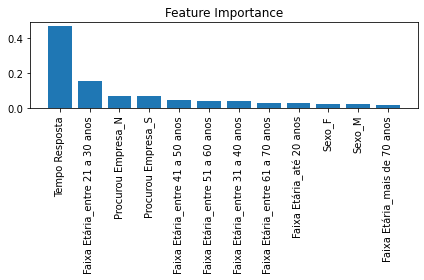

In [15]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train_n.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_n.shape[1]), X_train_n.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [16]:
print(rf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.6234646336298179


In [17]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train_n))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test_n))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train_n))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test_n))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train_n))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test_n))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train_n))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test_n))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train_n))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test_n))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train_n)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test_n)[:,1])}")

Acurácia (Treino): 0.6336039534062831
Acurácia (Teste): 0.6234646336298179
Acurácia Balanceada (Treino): 0.5840262815508717
Acurácia Balanceada (Teste): 0.574028521250439
Precision (Treino): 0.5635036496350365
Precision (Teste): 0.541991341991342
Recall (Treino): 0.3431111111111111
Recall (Teste): 0.33386666666666664
F1-Score (Treino): 0.4265193370165746
F1-Score (Teste): 0.41320132013201316
ROCAUC (Treino): 0.6550992974238876
ROCAUC (Teste): 0.6174493853178784


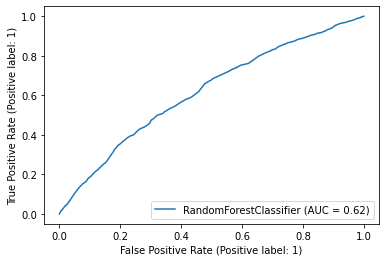

In [18]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test_n, y_test);

<h2>Gradient Boosting</h2>

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gbt = GradientBoostingClassifier(random_state=42)

In [21]:
gbt.fit(X_train_n, y_train)

GradientBoostingClassifier(random_state=42)

In [22]:
y_pred = gbt.predict(X_test_n)

In [23]:
importances = gbt.feature_importances_
features = X_train_n.columns
sorted_indices = np.argsort(importances)[::-1]
# summarize feature importance
for i,v in zip(features, importances):
	print('Feature: %s, Score: %.5f' % (i,v))

Feature: Tempo Resposta, Score: 0.32385
Feature: Sexo_F, Score: 0.01362
Feature: Sexo_M, Score: 0.01513
Feature: Faixa Etária_até 20 anos, Score: 0.04379
Feature: Faixa Etária_entre 21 a 30 anos, Score: 0.29508
Feature: Faixa Etária_entre 31 a 40 anos, Score: 0.06058
Feature: Faixa Etária_entre 41 a 50 anos, Score: 0.01775
Feature: Faixa Etária_entre 51 a 60 anos, Score: 0.03756
Feature: Faixa Etária_entre 61 a 70 anos, Score: 0.02113
Feature: Faixa Etária_mais de 70 anos, Score: 0.00740
Feature: Procurou Empresa_N, Score: 0.07563
Feature: Procurou Empresa_S, Score: 0.08847


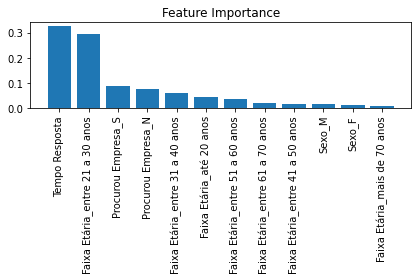

In [24]:
plt.title('Feature Importance')
plt.bar(range(X_train_n.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_n.shape[1]), X_train_n.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [25]:
print(f"Acurácia (Treino): {accuracy_score(y_train, gbt.predict(X_train_n))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, gbt.predict(X_test_n))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, gbt.predict(X_train_n))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, gbt.predict(X_test_n))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, gbt.predict(X_train_n))}")
print(f"Precision (Teste): {precision_score(y_test, gbt.predict(X_test_n))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, gbt.predict(X_train_n))}")
print(f"Recall (Teste): {recall_score(y_test, gbt.predict(X_test_n))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, gbt.predict(X_train_n))}")
print(f"F1-Score (Teste): {f1_score(y_test, gbt.predict(X_test_n))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, gbt.predict_proba(X_train_n)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, gbt.predict_proba(X_test_n)[:,1])}")

Acurácia (Treino): 0.6302859159901165
Acurácia (Teste): 0.6190173655230834
Acurácia Balanceada (Treino): 0.5715654436638044
Acurácia Balanceada (Teste): 0.5594152441166139
Precision (Treino): 0.568502824858757
Precision (Teste): 0.5405982905982906
Recall (Treino): 0.2862222222222222
Recall (Teste): 0.26986666666666664
F1-Score (Treino): 0.38074967482558825
F1-Score (Teste): 0.360014229811455
ROCAUC (Treino): 0.6458990996617227
ROCAUC (Teste): 0.6250965460718887


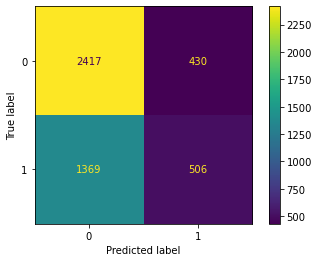

In [26]:
plot_confusion_matrix(gbt, X_test_n, y_test, values_format='d');

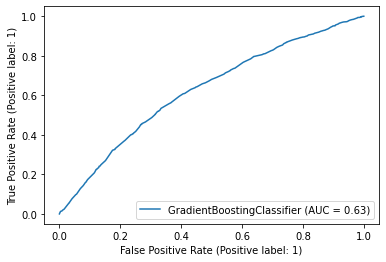

In [27]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gbt, X_test_n, y_test);

<h1>XGBoosting</h1>

In [28]:
from xgboost import XGBClassifier


In [29]:
xgb = XGBClassifier(random_state=42)

In [30]:
xgb.fit(X_train_n, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [31]:
y_pred = xgb.predict(X_test_n)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

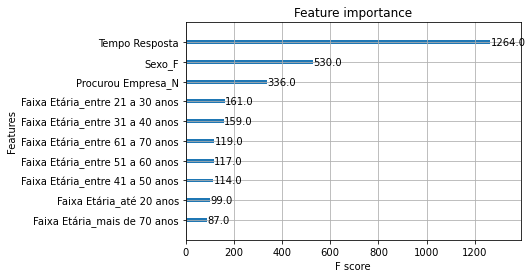

In [32]:
from xgboost import plot_importance
plot_importance(xgb)


In [47]:
xgb.get_score(importance_type='gain')

AttributeError: 'XGBClassifier' object has no attribute 'get_score'

In [33]:
print(f"Acurácia (Treino): {accuracy_score(y_train, xgb.predict(X_train_n))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, xgb.predict(X_test_n))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, xgb.predict(X_train_n))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, xgb.predict(X_test_n))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, xgb.predict(X_train_n))}")
print(f"Precision (Teste): {precision_score(y_test, xgb.predict(X_test_n))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, xgb.predict(X_train_n))}")
print(f"Recall (Teste): {recall_score(y_test, xgb.predict(X_test_n))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, xgb.predict(X_train_n))}")
print(f"F1-Score (Teste): {f1_score(y_test, xgb.predict(X_test_n))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, xgb.predict_proba(X_train_n)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, xgb.predict_proba(X_test_n)[:,1])}")

Acurácia (Treino): 0.6333215672432051
Acurácia (Teste): 0.6228293096145701
Acurácia Balanceada (Treino): 0.5837314077543586
Acurácia Balanceada (Teste): 0.573410607657183
Precision (Treino): 0.5629197080291971
Precision (Teste): 0.5406574394463668
Recall (Treino): 0.34275555555555554
Recall (Teste): 0.3333333333333333
F1-Score (Treino): 0.4260773480662983
F1-Score (Teste): 0.4124051468162323
ROCAUC (Treino): 0.6538089305230289
ROCAUC (Teste): 0.6208468329235453


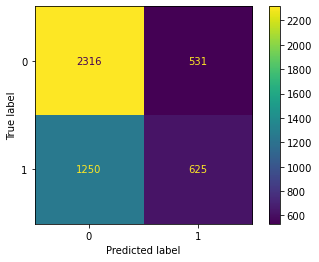

In [34]:
plot_confusion_matrix(xgb, X_test_n, y_test, values_format='d');

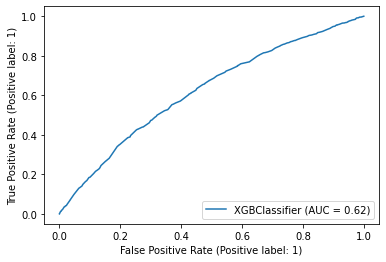

In [35]:
plot_roc_curve(xgb, X_test_n, y_test);

<h1>LightGBM</h1>

In [36]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(X_train_n, y_train)

LGBMClassifier(random_state=42)

In [37]:
y_pred = lgbm.predict(X_test_n)

In [38]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lgbm.predict(X_train_n))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lgbm.predict(X_test_n))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lgbm.predict(X_train_n))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lgbm.predict(X_test_n))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lgbm.predict(X_train_n))}")
print(f"Precision (Teste): {precision_score(y_test, lgbm.predict(X_test_n))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lgbm.predict(X_train_n))}")
print(f"Recall (Teste): {recall_score(y_test, lgbm.predict(X_test_n))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lgbm.predict(X_train_n))}")
print(f"F1-Score (Teste): {f1_score(y_test, lgbm.predict(X_test_n))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lgbm.predict_proba(X_train_n)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lgbm.predict_proba(X_test_n)[:,1])}")

Acurácia (Treino): 0.63261560183551
Acurácia (Teste): 0.6221939855993224
Acurácia Balanceada (Treino): 0.5832976320582878
Acurácia Balanceada (Teste): 0.5733389532841587
Precision (Treino): 0.5611030478955007
Precision (Teste): 0.5389221556886228
Recall (Treino): 0.3436444444444444
Recall (Teste): 0.336
F1-Score (Treino): 0.4262403528114663
F1-Score (Teste): 0.4139290407358739
ROCAUC (Treino): 0.6523108717148062
ROCAUC (Teste): 0.621967263786442


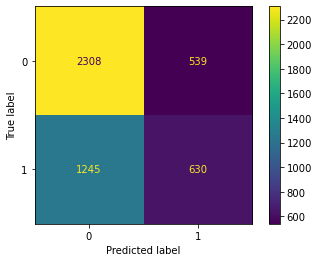

In [39]:
plot_confusion_matrix(lgbm, X_test_n, y_test, values_format='d');

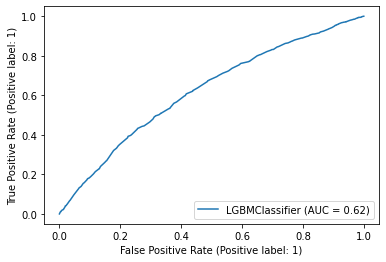

In [40]:
plot_roc_curve(lgbm, X_test_n, y_test);

In [41]:
importances = lgbm.feature_importances_
features = X_train_n.columns
sorted_indices = np.argsort(importances)[::-1]
# summarize feature importance
for i,v in zip(features, importances):
	print('Feature: %s, Score: %.5f' % (i,v))

Feature: Tempo Resposta, Score: 1393.00000
Feature: Sexo_F, Score: 295.00000
Feature: Sexo_M, Score: 56.00000
Feature: Faixa Etária_até 20 anos, Score: 136.00000
Feature: Faixa Etária_entre 21 a 30 anos, Score: 174.00000
Feature: Faixa Etária_entre 31 a 40 anos, Score: 185.00000
Feature: Faixa Etária_entre 41 a 50 anos, Score: 145.00000
Feature: Faixa Etária_entre 51 a 60 anos, Score: 119.00000
Feature: Faixa Etária_entre 61 a 70 anos, Score: 135.00000
Feature: Faixa Etária_mais de 70 anos, Score: 88.00000
Feature: Procurou Empresa_N, Score: 216.00000
Feature: Procurou Empresa_S, Score: 58.00000


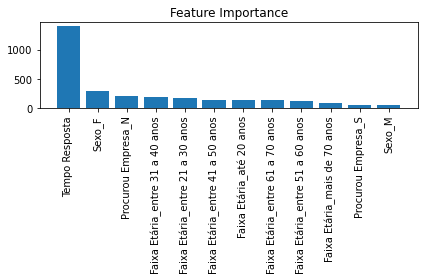

In [42]:
plt.title('Feature Importance')
plt.bar(range(X_train_n.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_n.shape[1]), X_train_n.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()